# Customer Churn Prediction Project

This notebook demonstrates exploratory data analysis (EDA), feature engineering, and machine learning model training to predict customer churn.

In [1209]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [1210]:
# Load the dataset
df = pd.read_csv('/content/customer_churn_data.csv')

In [1211]:
# Display the first few rows of the dataset
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


## Exploratory Data Analysis (EDA)

Let's inspect the dataset and handle missing values.

In [1212]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [1213]:
# Check for missing values in each column
df.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,297
TotalCharges,0
TechSupport,0
Churn,0


In [1214]:
# Fill missing values in 'InternetService' with an empty string
df["InternetService"] = df["InternetService"].fillna("")

In [1215]:
# Confirm that all missing values have been handled
df.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,0
TotalCharges,0
TechSupport,0
Churn,0


### Data Cleaning and Summary Statistics

Check for duplicates and review summary statistics.

In [1216]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [1217]:
# Display summary statistics for numerical columns
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


## Feature Engineering and Correlation Analysis

In this section, we select numeric columns and analyze their correlations to inform feature engineering decisions.

In [1218]:
# Select only numeric columns for correlation analysis
numeric_columns_data = df.select_dtypes(include = ["number"])

In [1219]:
# Compute and display the correlation matrix for numeric features
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


## Target Variable Distribution and Visualization

Let's analyze the distribution of the target variable (Churn) and visualize it.

In [1220]:
# Display the value counts for the target variable (Churn)
df["Churn"].value_counts()

,count
Churn,
Yes,883
No,117


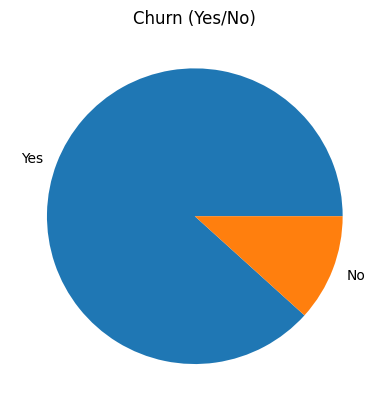

In [1221]:
# Plot a pie chart to visualize the distribution of Churn
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn (Yes/No)")
plt.ylabel("")
plt.show()

In [1222]:
df.groupby("Churn")["MonthlyCharges"].mean()

,MonthlyCharges
Churn,
No,62.54641
Yes,75.96077


In [1223]:
df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [1224]:
df.groupby("Churn")["Tenure"].mean()

,Tenure
Churn,
No,30.264957
Yes,17.476784


In [1225]:
df.groupby("Churn")["Age"].mean()

,Age
Churn,
No,43.487179
Yes,44.831257


## Relationship Between Contract Type and Monthly Charges

Let's examine how the contract type affects the average monthly charges.

In [1226]:
# Calculate the mean monthly charges for each contract type
df.groupby("ContractType")["MonthlyCharges"].mean()

,MonthlyCharges
ContractType,
Month-to-Month,75.909198
One-Year,73.822803
Two-Year,71.334500


Longer contract customers have lower average monthly charges.

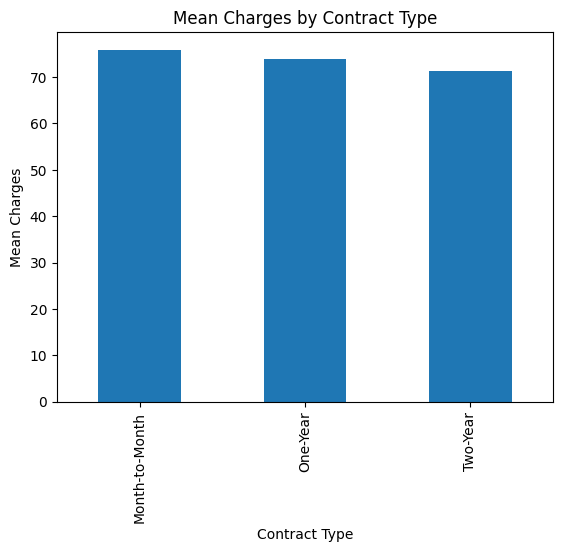

In [1227]:
# Visualize the mean monthly charges by contract type
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.title("Mean Charges by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Mean Charges")
plt.show()

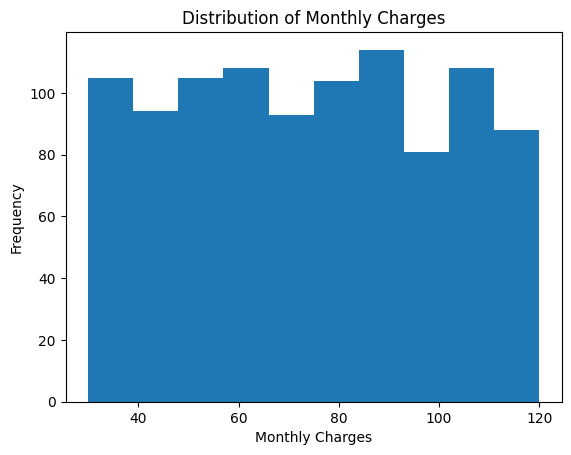

In [1228]:
plt.hist(df["MonthlyCharges"])
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

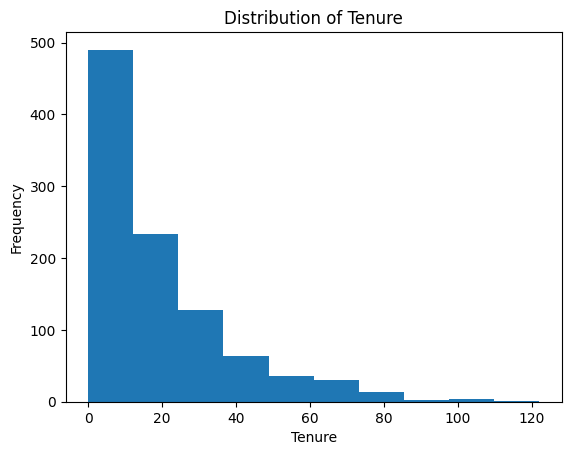

In [1229]:
plt.hist(df["Tenure"])
plt.title("Distribution of Tenure")
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.show()

In [1230]:
y = df[["Churn"]]
x = df[["Age", "Gender", "Tenure", "MonthlyCharges"]]

In [1231]:
# Encode the Gender column: Female as 1, Male as 0
x["Gender"] = x["Gender"].apply(lambda x: 1 if x == "Female" else 0)

In [1232]:
# Encode the Churn column: Yes as 1, No as 0
y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

# Model Training

In [1233]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [1234]:
# Initialize the StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [1235]:
# Fit the scaler on training data and transform it
x_train = scaler.fit_transform(x_train)

In [1236]:
# Save the fitted scaler for later use in deployment
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [1237]:
# Transform the test data using the fitted scaler
x_test = scaler.fit_transform(x_test)

In [1238]:
# Define a function to print accuracy score for model predictions
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
  print("Accuracy score of the model is {}".format(accuracy_score(y_test, predictions)))

In [1239]:
# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [1240]:
# Import LogisticRegression model
from sklearn.linear_model import LogisticRegression

In [1241]:
import warnings
warnings.filterwarnings("ignore")

In [1242]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [1243]:
y_pred = log_model.predict(x_test)

In [1244]:
modelperformance(y_pred)

Accuracy score of the model is 0.91


In [1245]:
from sklearn.neighbors import KNeighborsClassifier

In [1246]:
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"]
}


In [1247]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

In [1248]:
gridkn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [1249]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [1250]:
y_pred = gridkn.predict(x_test)

In [1251]:
modelperformance(y_pred)

Accuracy score of the model is 0.89


In [1252]:
from sklearn.svm import SVC

In [1253]:
svm = SVC()

In [1254]:
param_grid = {
    "C": [0.01, 0.1, 0.5, 1],
    "kernel": ["linear", "rbf", "poly"]
}

In [1255]:
gridsvc = GridSearchCV(svm, param_grid, cv = 5)

In [1256]:
gridsvc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [1257]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [1258]:
y_pred = gridsvc.predict(x_test)

In [1259]:
modelperformance(y_pred)

Accuracy score of the model is 0.915


In [1260]:
from sklearn.tree import DecisionTreeClassifier

In [1261]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [1262]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

In [1263]:
grid_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [1264]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [1265]:
y_pred = grid_tree.predict(x_test)

In [1266]:
modelperformance(y_pred)

Accuracy score of the model is 0.895


In [1267]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [1268]:
param_grid = {
    "n_estimators": [16, 32, 64, 128, 256],
    "max_features": [2, 3, 4],
    "bootstrap": [True, False]
}

In [1269]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv = 5)

In [1270]:
grid_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [16, 32, 64, 128, 256]})

In [1271]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64}

In [1272]:
y_pred = grid_rfc.predict(x_test)

In [1273]:
modelperformance(y_pred)

Accuracy score of the model is 0.88


In [1275]:
best_model = gridsvc.best_estimator_

In [1276]:
joblib.dump(best_model, "model.pkl")

['model.pkl']

## Conclusions and Future Work

- Among all tested models (Logistic Regression, KNN, Decision Tree, Random Forest, and SVC), the SVC model achieved the highest accuracy of 0.915.
- The best SVC model was saved as the final model for deployment.
- Decision Tree and Random Forest also performed well, with accuracies of 0.895 and 0.88, respectively.

### Future Work
- Explore advanced ensemble methods (e.g., XGBoost, LightGBM) for potentially higher accuracy.
- Perform feature engineering and selection to further improve model performance.
- Implement model interpretability techniques to better understand churn drivers.
